# Анализ и предсказание цен квартир города Нью-Йорк на основе данных Airbnb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("nyc.csv")

## Получаем информацию о датасете

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df = df.drop(labels=["id", "name", "host_id", "host_name", "last_review"], axis=1)

In [6]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Обработка данных

#### Заменим в reviews_per_months пропущенные значения на нулевые, а также удалим квартиры с price = 0

In [8]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df = df.drop(df[df["price"] == 0].index)

#### Заменим долготу и широту расстоянием до центра

In [9]:
lat_mean = df["latitude"].mean()
lon_mean = df["longitude"].mean()

In [10]:
df["center_distance"] = df.apply(lambda row: \
    math.sqrt((row["latitude"] - lat_mean)**2 + (row["longitude"] - lon_mean)**2), axis=1)

In [11]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498,0.060602
std,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271,0.037838
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000222
25%,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.038034
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.051355
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.072433
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,0.368568


In [12]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
center_distance                   0
dtype: int64

## Распределение данных

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'center_distance'}>]], dtype=object)

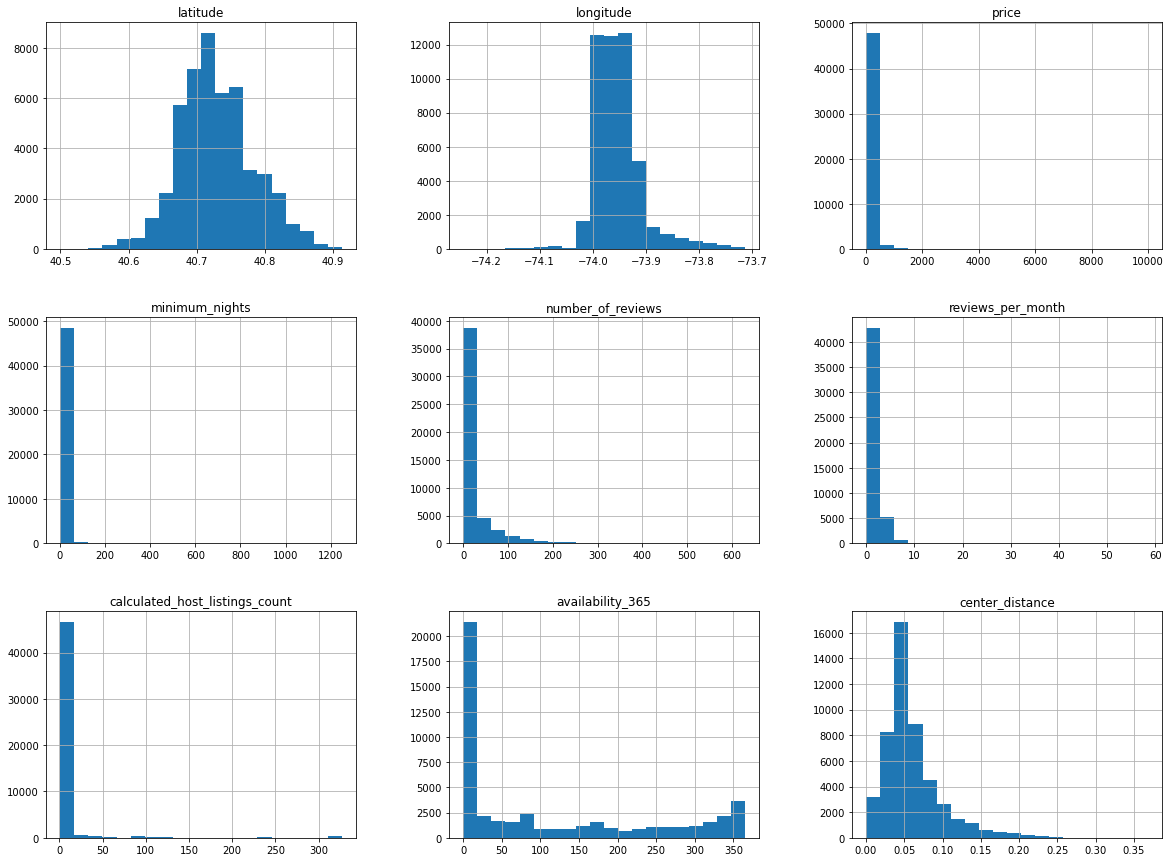

In [13]:
df.hist(figsize=(20, 15), bins=20)

#### Рассотрим price и логарифмированный price

<AxesSubplot:>

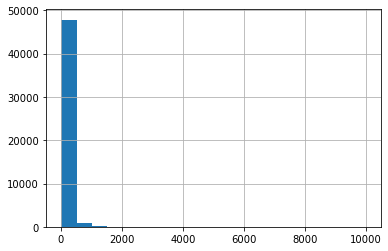

In [14]:
df["price"].hist(bins=20)

In [15]:
df["price"] = np.log(df["price"])

<AxesSubplot:>

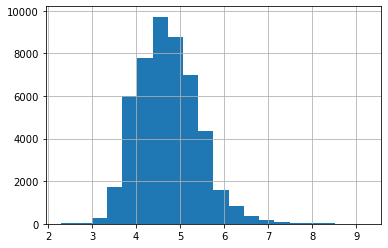

In [16]:
df["price"].hist(bins=20)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'latitude'),
  Text(2, 0, 'longitude'),
  Text(3, 0, 'price'),
  Text(4, 0, 'minimum_nights'),
  Text(5, 0, 'number_of_reviews'),
  Text(6, 0, 'reviews_per_month'),
  Text(7, 0, 'calculated_host_listings_count'),
  Text(8, 0, 'availability_365'),
  Text(9, 0, 'center_distance')])

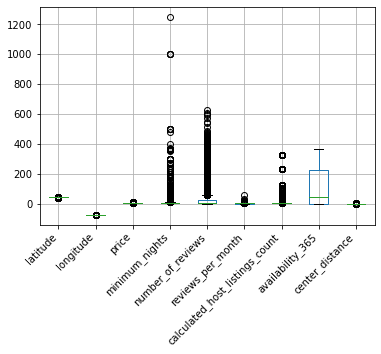

In [17]:
df.boxplot()
plt.xticks(rotation=45, ha='right')

## Корреляция

In [18]:
corr = df.corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance
latitude,1.000000,0.084830,0.079430,0.024893,-0.015357,-0.018719,0.019518,-0.010942,0.043820
longitude,0.084830,1.000000,-0.326143,-0.062772,0.059015,0.138435,-0.114715,0.082669,0.414505
price,0.079430,-0.326143,1.000000,0.033236,-0.042319,-0.060307,0.132655,0.098844,-0.224633
minimum_nights,0.024893,-0.062772,0.033236,1.000000,-0.080080,-0.124870,0.127962,0.144275,-0.044684
number_of_reviews,-0.015357,0.059015,-0.042319,-0.080080,1.000000,0.589311,-0.072385,0.171975,0.046347
reviews_per_month,-0.018719,0.138435,-0.060307,-0.124870,0.589311,1.000000,-0.047322,0.163664,0.124027
calculated_host_listings_count,0.019518,-0.114715,0.132655,0.127962,-0.072385,-0.047322,1.000000,0.225712,-0.040542
availability_365,-0.010942,0.082669,0.098844,0.144275,0.171975,0.163664,0.225712,1.000000,0.139547
center_distance,0.043820,0.414505,-0.224633,-0.044684,0.046347,0.124027,-0.040542,0.139547,1.000000


<AxesSubplot:>

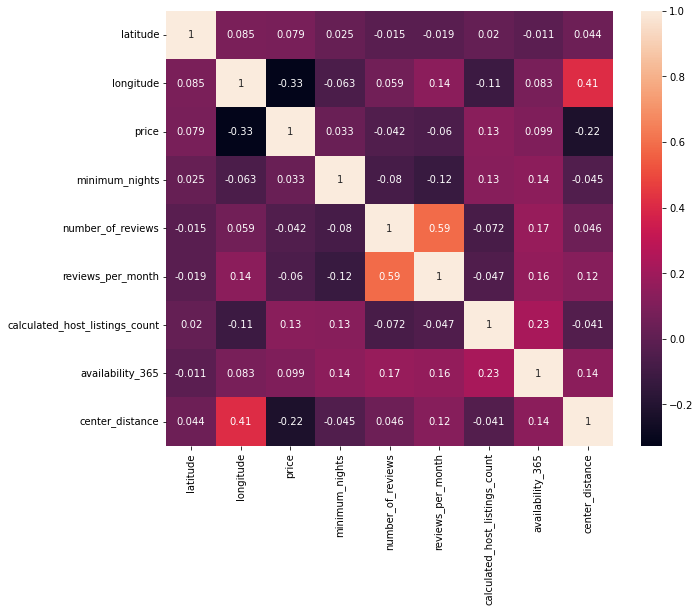

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

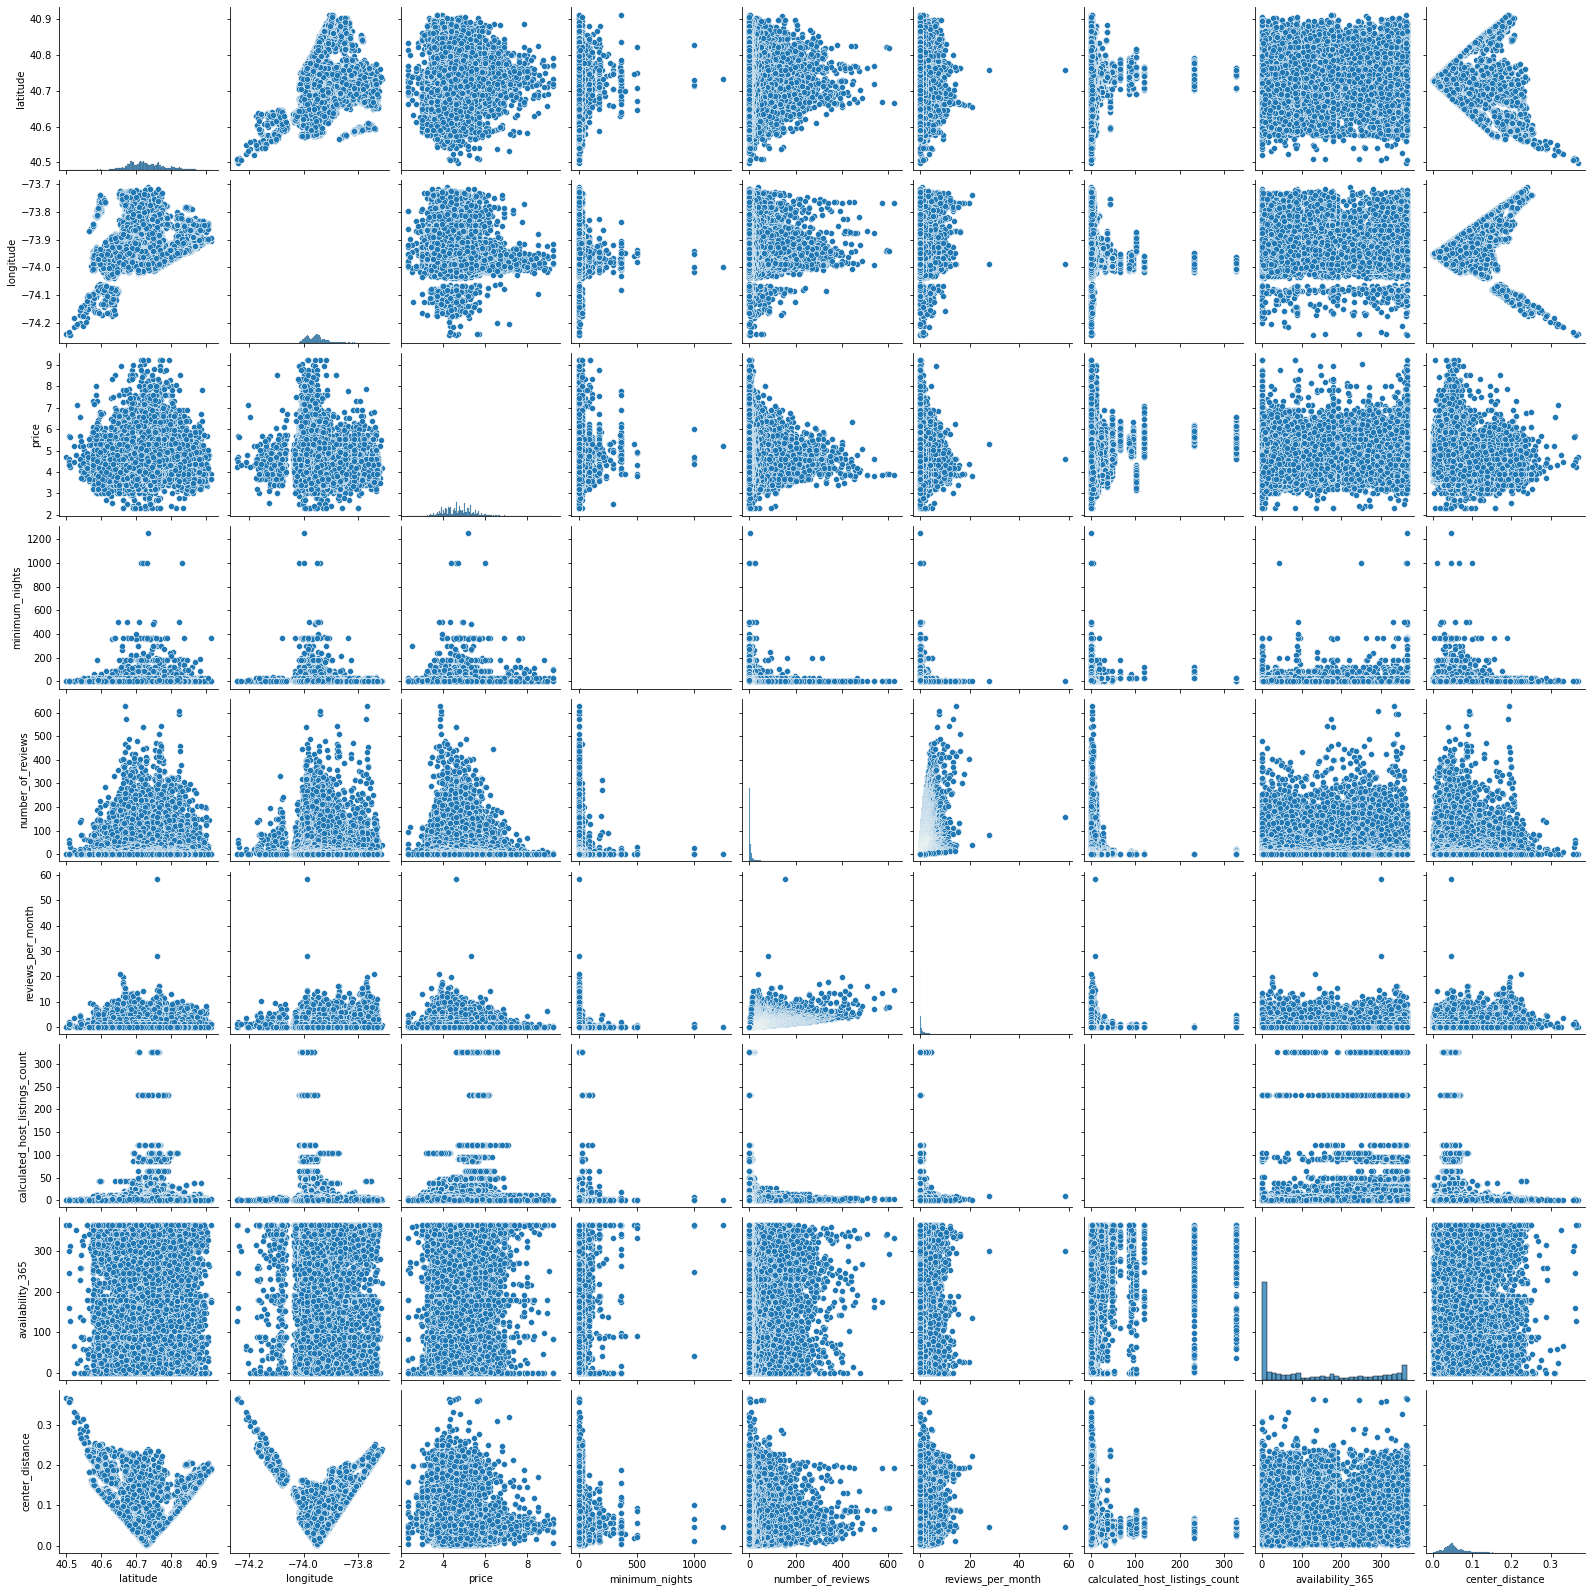

In [20]:
sns.pairplot(df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  object 
 1   neighbourhood                   48884 non-null  object 
 2   latitude                        48884 non-null  float64
 3   longitude                       48884 non-null  float64
 4   room_type                       48884 non-null  object 
 5   price                           48884 non-null  float64
 6   minimum_nights                  48884 non-null  int64  
 7   number_of_reviews               48884 non-null  int64  
 8   reviews_per_month               48884 non-null  float64
 9   calculated_host_listings_count  48884 non-null  int64  
 10  availability_365                48884 non-null  int64  
 11  center_distance                 48884 non-null  float64
dtypes: float64(5), int64(4), object(

## Замена категориальных переменных с помощью OneHotEncoding

In [22]:
df = pd.get_dummies(df, drop_first=True)

## Удалим longitude, latitude

In [23]:
df = df.drop(labels=["latitude", "longitude"], axis=1)

In [24]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,5.003946,1,9,0.21,6,365,0.083928,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.416100,1,45,0.38,2,355,0.040083,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.010635,3,0,0.00,1,365,0.080724,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4.488636,1,270,4.64,1,194,0.044464,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.382027,10,9,0.10,1,0,0.070037,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Сделаем копию для полиномиальных признаков. Рассмотрим их в конце

In [25]:
df_polynomial = df.copy()

##  Разделим и стандартизируем данные

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [28]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [29]:
df_train[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"]] = \
sc.fit_transform(df_train[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"]])

In [30]:
df_test[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"]] = \
sc.transform(df_test[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"]])

In [31]:
y_train = df_train["price"]
y_test = df_test["price"]

In [32]:
X_train = df_train.drop("price", axis=1)
X_test = df_test.drop("price", axis=1)

## Метрики

In [33]:
from sklearn import metrics

In [34]:
def print_metrics(y_real, y_pred):
    print(f"MAE {metrics.mean_absolute_error(np.exp(y_real), np.exp(y_pred))}")
    print(f"MSE {metrics.mean_squared_error(np.exp(y_real), np.exp(y_pred))}")
    print(f"RMSE { math.sqrt(metrics.mean_squared_error(np.exp(y_real), np.exp(y_pred)))}")
    print(f"MAPE {metrics.mean_absolute_percentage_error(np.exp(y_real), np.exp(y_pred)) * 100}")
    print(f"R2 {metrics.r2_score(np.exp(y_real), np.exp(y_pred))}")

## Константный прогноз

In [35]:
mean_val = y_train.mean()
y_pred_mean = np.ones(y_test.shape) * mean_val
print_metrics(y_test, y_pred_mean)

MAE 87.23364238157484
MSE 68355.8333291714
RMSE 261.4494852340914
MAPE 60.79119100536548
R2 -0.028477975787197796


## Строим модель логистической регрессии

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

### Метрики

In [38]:
print_metrics(y_test, y_pred)

C:\Users\maslo\AppData\Local\Temp\ipykernel_11180\1317138476.py:2: RuntimeWarning: overflow encountered in exp
  print(f"MAE {metrics.mean_absolute_error(np.exp(y_real), np.exp(y_pred))}")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Получается, что модель предсказывает очень большие значения, при которых exp(y_pred) выходит за рамки float64

### Коэфициенты признаков

<AxesSubplot:xlabel='feature', ylabel='importance'>

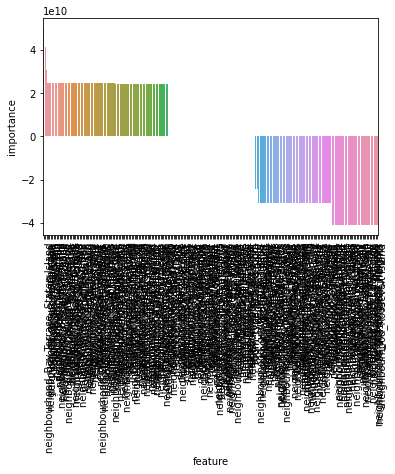

In [39]:
feature_df = pd.DataFrame({"feature": df.drop("price", axis=1).columns, "importance": lr.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

In [40]:
feature_df

,feature,importance
18,"neighbourhood_Bay Terrace, Staten Island",5.023192e+10
7,neighbourhood_group_Manhattan,4.107555e+10
8,neighbourhood_group_Queens,3.070216e+10
183,neighbourhood_Sea Gate,2.445355e+10
138,neighbourhood_Mill Basin,2.445355e+10
...,...,...
112,neighbourhood_Inwood,-4.107555e+10
103,neighbourhood_Harlem,-4.107555e+10
139,neighbourhood_Morningside Heights,-4.107555e+10
215,neighbourhood_Washington Heights,-4.107555e+10


## Lasso-регрессия

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [42]:
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [43]:
y_pred = lasso.predict(X_test)

### Метрики

In [44]:
print_metrics(y_test, y_pred)

MAE 87.23364238157498
MSE 68355.83332917102
RMSE 261.44948523409073
MAPE 60.791191005367985
R2 -0.028477975787192245


### Коэфициенты

<AxesSubplot:xlabel='feature', ylabel='importance'>

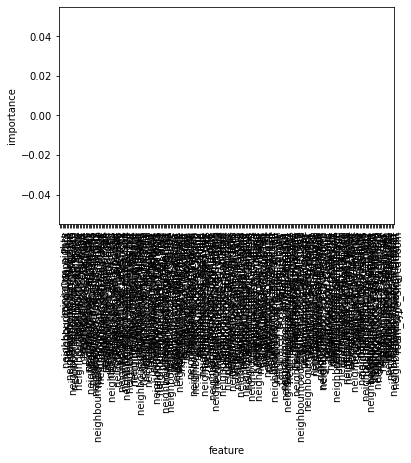

In [45]:
feature_df = pd.DataFrame({"feature": df.drop("price" , axis=1).columns, "importance": lasso.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

#### Lasso-регрессия зануляет все признаки и получаем в итоге константную модель

## Lasso и GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

params = {"alpha": [0.001, 0.01, 0.1, 0.25, 0.5, 0.8, 1]}

In [47]:
grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train, y_train)
print(f"Лучший параметр {grid_lasso.best_params_}")

Лучший параметр {'alpha': 0.001}


In [48]:
y_pred = grid_lasso.predict(X_test)

### Метрики

In [49]:
print_metrics(y_test, y_pred)

MAE 64.5903419708822
MSE 60855.57706114037
RMSE 246.6892317494632
MAPE 35.49613125300326
R2 0.08437045292382839


### Коэфициенты

<AxesSubplot:xlabel='feature', ylabel='importance'>

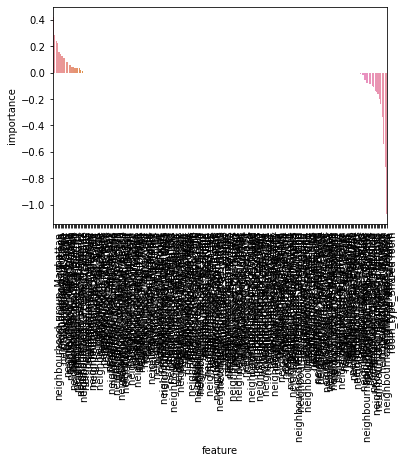

In [50]:
feature_df = pd.DataFrame({"feature": df.drop("price", axis=1).columns, "importance": grid_lasso.best_estimator_.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

## LassoCV

In [51]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

In [52]:
lasso_cv.fit(X_train, y_train)
print(f"Лучший параметр {lasso_cv.alpha_}")

Лучший параметр 0.00019509179877400359


In [53]:
y_pred = lasso_cv.predict(X_test)

### Метрики

In [54]:
print_metrics(y_test, y_pred)

MAE 63.84980481397967
MSE 60300.43586795044
RMSE 245.56147065032502
MAPE 34.81959293290471
R2 0.092723075704369


### Коэфициенты

<AxesSubplot:xlabel='feature', ylabel='importance'>

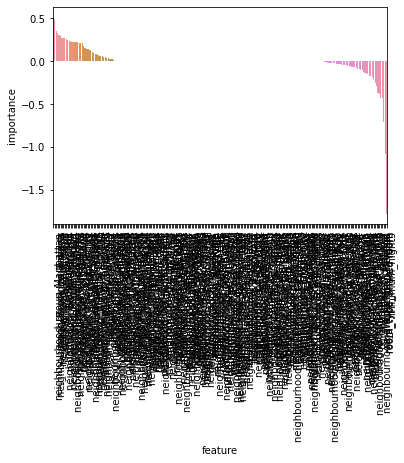

In [55]:
feature_df = pd.DataFrame({"feature": df.drop("price", axis=1).columns, "importance": lasso_cv.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

## Ridge-регрессия

In [56]:
from sklearn.linear_model import Ridge

ridge = Ridge()

In [57]:
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

### Метрики

In [58]:
print_metrics(y_test, y_pred)

MAE 63.72832509515391
MSE 60088.56811603123
RMSE 245.1296965200896
MAPE 34.66803417425383
R2 0.09591082583505839


### Коэфициенты признаков

<AxesSubplot:xlabel='feature', ylabel='importance'>

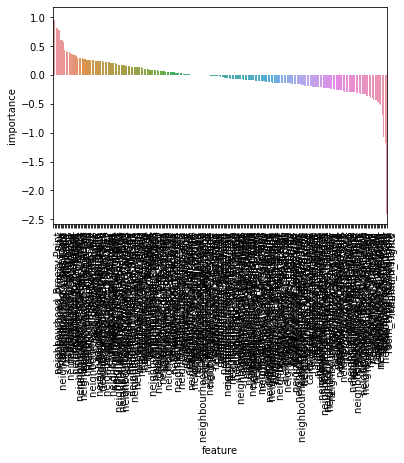

In [59]:
feature_df = pd.DataFrame({"feature": df.drop("price", axis=1).columns, "importance": ridge.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

## RidgeCV

In [60]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV()

In [61]:
ridge_cv.fit(X_train, y_train)
print(f"Лучший параметр {ridge_cv.alpha_}")

Лучший параметр 1.0


In [62]:
y_pred = ridge_cv.predict(X_test)

### Метрики

In [63]:
print_metrics(y_test, y_pred)

MAE 63.72832509513677
MSE 60088.56811604733
RMSE 245.12969652012245
MAPE 34.6680341742465
R2 0.09591082583481614


### Коэфициенты

<AxesSubplot:xlabel='feature', ylabel='importance'>

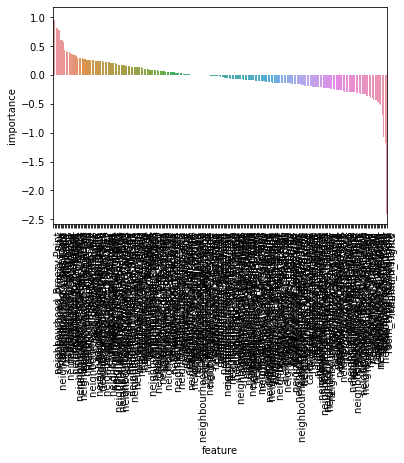

In [64]:
feature_df = pd.DataFrame({"feature": df.drop("price", axis=1).columns, "importance": ridge_cv.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

## Polynomial Features

#### Рассмотрим, стоит ли рассматривать не только линейную зависимость признаков, но и квадратичную. Для этого будем использовать Ridge-регрессию, так как она дала лучшие результаты.

In [76]:
df_polynomial.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,5.003946,1,9,0.21,6,365,0.083928,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.416100,1,45,0.38,2,355,0.040083,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.010635,3,0,0.00,1,365,0.080724,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4.488636,1,270,4.64,1,194,0.044464,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.382027,10,9,0.10,1,0,0.070037,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Добавим квадратичные признаки, которые и будут обеспечивать квадратичную зависимость.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

In [107]:
X_polynomial = df_polynomial.drop("price", axis=1).reset_index(drop=True)
y_polynomial = df_polynomial["price"]

In [108]:
X_polynomial.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distance,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,1,9,0.21,6,365,0.083928,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,45,0.38,2,355,0.040083,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0.00,1,365,0.080724,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,270,4.64,1,194,0.044464,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,9,0.10,1,0,0.070037,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
X_polynomial_new = pf.fit_transform(X_polynomial[["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"]])

In [110]:
X_polynomial_new = pd.DataFrame(X_polynomial_new)
X_polynomial_new.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,9.0,0.21,6.0,365.0,0.083928,1.0,9.0,0.21,6.0,...,0.0441,1.26,76.65,0.017625,36.0,2190.0,0.503571,133225.0,30.633881,0.007044
1,1.0,45.0,0.38,2.0,355.0,0.040083,1.0,45.0,0.38,2.0,...,0.1444,0.76,134.90,0.015232,4.0,710.0,0.080167,126025.0,14.229630,0.001607
2,3.0,0.0,0.00,1.0,365.0,0.080724,9.0,0.0,0.00,3.0,...,0.0000,0.00,0.00,0.000000,1.0,365.0,0.080724,133225.0,29.464257,0.006516
3,1.0,270.0,4.64,1.0,194.0,0.044464,1.0,270.0,4.64,1.0,...,21.5296,4.64,900.16,0.206314,1.0,194.0,0.044464,37636.0,8.626075,0.001977
4,10.0,9.0,0.10,1.0,0.0,0.070037,100.0,90.0,1.00,10.0,...,0.0100,0.10,0.00,0.007004,1.0,0.0,0.070037,0.0,0.000000,0.004905


In [111]:
X_polynomial = X_polynomial.drop(labels=["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "center_distance"], axis=1)

In [112]:
X_polynomial = pd.concat([X_polynomial,X_polynomial_new], axis=1)

In [113]:
X_polynomial.head()

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,...,17,18,19,20,21,22,23,24,25,26
0,1,0,0,0,0,0,0,0,0,0,...,0.0441,1.26,76.65,0.017625,36.0,2190.0,0.503571,133225.0,30.633881,0.007044
1,0,1,0,0,0,0,0,0,0,0,...,0.1444,0.76,134.90,0.015232,4.0,710.0,0.080167,126025.0,14.229630,0.001607
2,0,1,0,0,0,0,0,0,0,0,...,0.0000,0.00,0.00,0.000000,1.0,365.0,0.080724,133225.0,29.464257,0.006516
3,1,0,0,0,0,0,0,0,0,0,...,21.5296,4.64,900.16,0.206314,1.0,194.0,0.044464,37636.0,8.626075,0.001977
4,0,1,0,0,0,0,0,0,0,0,...,0.0100,0.10,0.00,0.007004,1.0,0.0,0.070037,0.0,0.000000,0.004905


#### Поделим и стандартизируем данные

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_polynomial, y_polynomial, test_size=0.3)

In [115]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Создание модели

In [125]:
lr = Ridge()

In [126]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#### Метрики

In [127]:
print_metrics(y_test, y_pred)

MAE 62.4522348723754
MSE 54786.838226036045
RMSE 234.0658843702688
MAPE 34.60397561748576
R2 0.10183900298752513


#### Коэфициенты признаков

<AxesSubplot:xlabel='feature', ylabel='importance'>

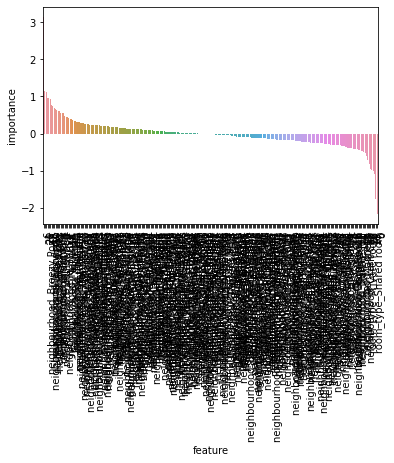

In [128]:
feature_df = pd.DataFrame({"feature": X_polynomial.columns, "importance": lr.coef_})
feature_df.sort_values("importance", ascending=False, inplace=True)
plt.xticks(rotation=90, ha='left')
sns.barplot(data=feature_df, x="feature", y="importance")

#### Как видим из метрик, результаты чуть лучше, чем при линейной Ridge.